# Import and Read Census Income Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Load the dataset
filepath = "Census-Income-Dataset/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                "marital_status", "occupation", "relationship", "race", 
                "sex", "capital_gain", "capital_loss", "hours_per_week", 
                "native_country", "income"]
data = pd.read_csv(filepath, names=column_names)
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Total records
print("Total records :",data.shape[0])
print("Total features:",data.shape[1])
print("Total individuals <=$50k:",data[data['income'] == ' <=50K'].shape[0])
print("Total individuals  >$50k:",data[data['income'] == ' >50K'].shape[0])

Total records : 32561
Total features: 15
Total individuals <=$50k: 24720
Total individuals  >$50k: 7841


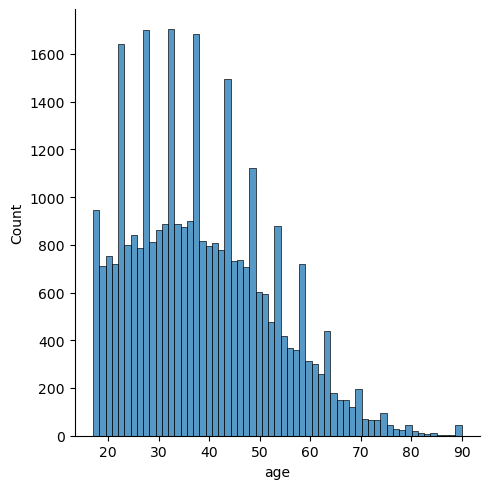

In [4]:
# Age
sns.displot(data.age)

In [5]:
data.age.value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

<Axes: xlabel='count', ylabel='workclass'>

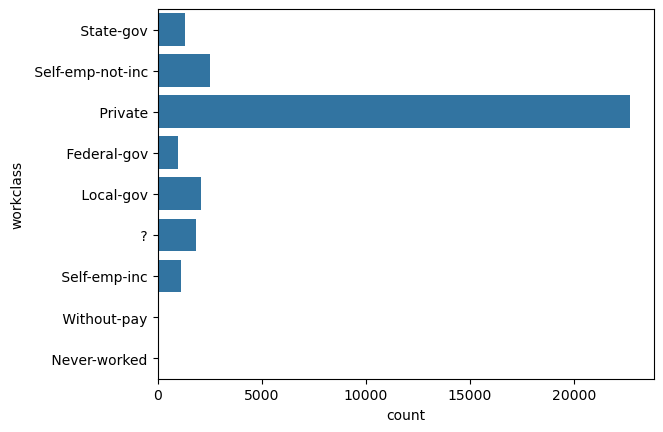

In [6]:
# Workclass
sns.countplot(data.workclass)

In [7]:
data.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='education'>

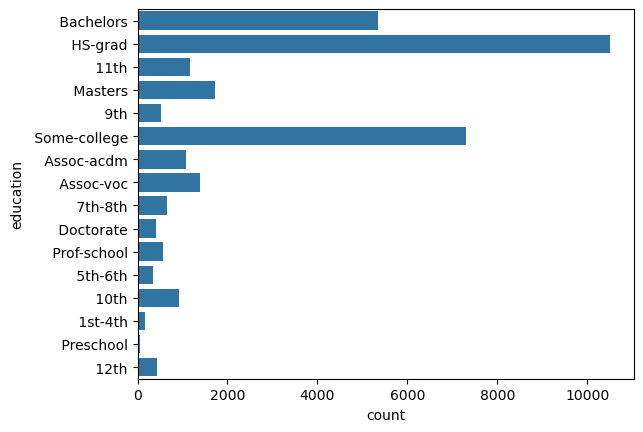

In [8]:
# Education
sns.countplot(data.education)

In [9]:
data.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [10]:
# Education_num
data.education_num.value_counts()

education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='marital_status'>

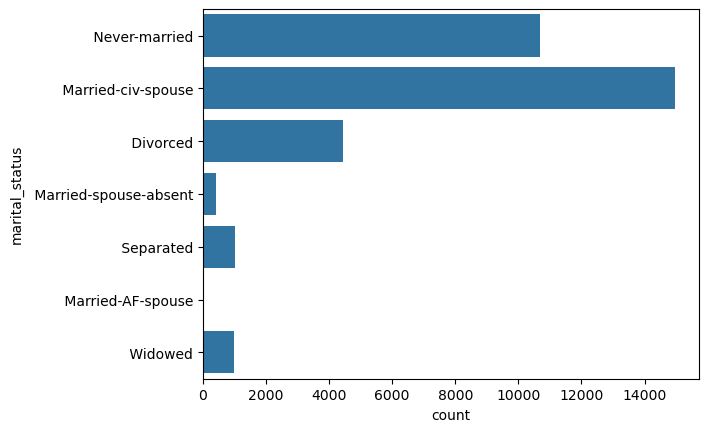

In [11]:
# Marital_status
sns.countplot(data.marital_status)

In [12]:
data.marital_status.value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='occupation'>

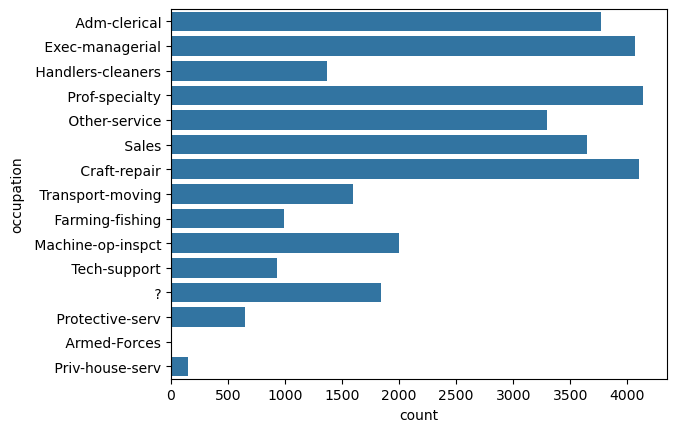

In [13]:
# Occupation 
sns.countplot(data.occupation)

In [14]:
data.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='relationship'>

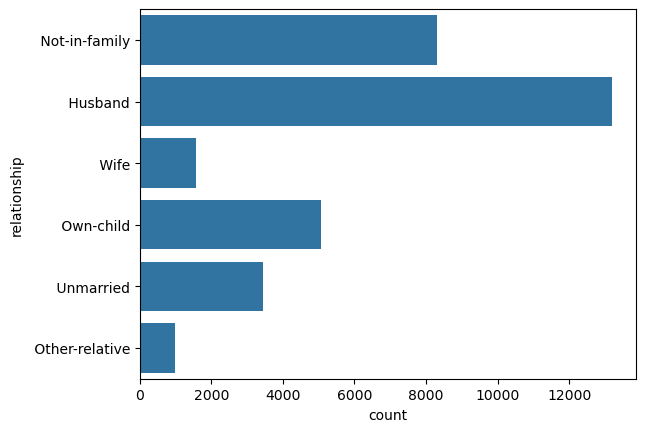

In [15]:
# Relationship 
sns.countplot(data.relationship)

In [16]:
data.relationship.value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='race'>

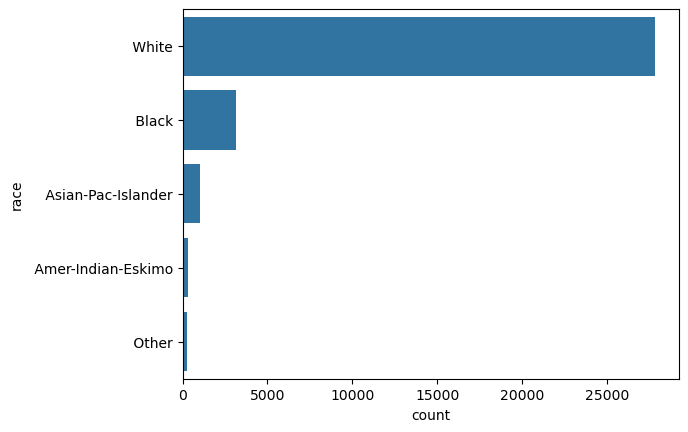

In [17]:
# Race 
sns.countplot(data.race)

In [18]:
data.race.value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

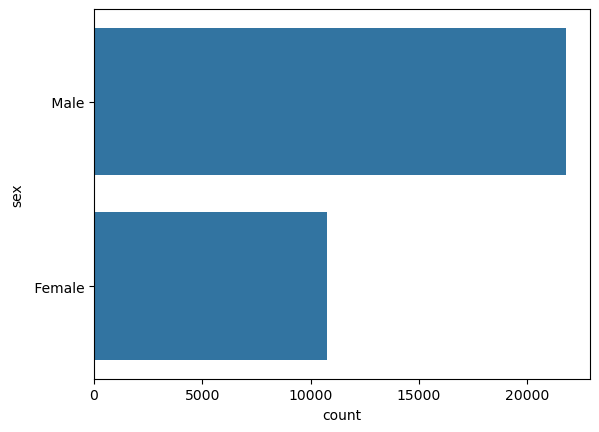

In [19]:
# Sex 
sns.countplot(data.sex)

In [20]:
data.sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [21]:
# Capital_gain
data.capital_gain.value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [22]:
# Capital_loss
data.capital_loss.value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [23]:
# Hours_per_week
data.hours_per_week.value_counts()

hours_per_week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

<Axes: xlabel='count', ylabel='native_country'>

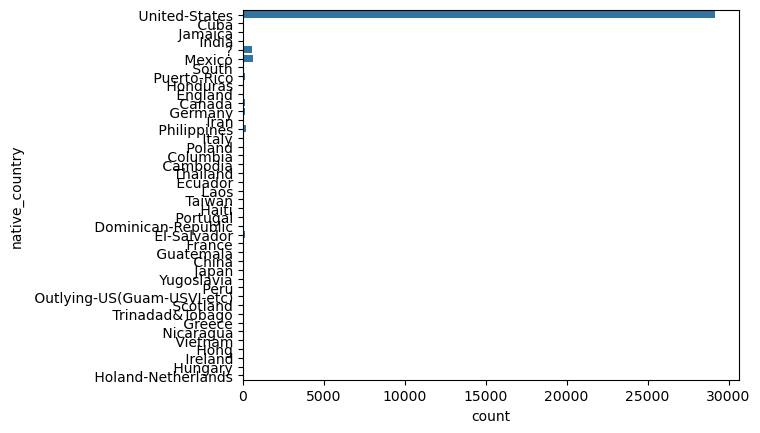

In [24]:
# Native_country 
sns.countplot(data.native_country)

In [25]:
data.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

# Data Preprocessing

In [ ]:
# Encode income column
data['income'] = data['income'].replace({' <=50K': 0})
data['income'] = data['income'].replace({' >50K': 1})                

<Axes: >

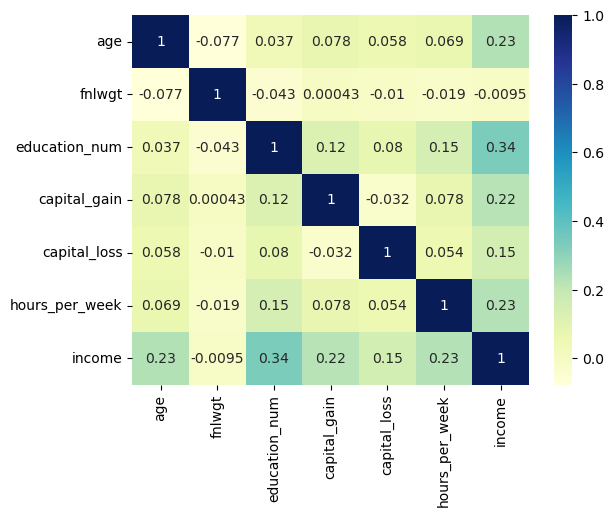

In [27]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [28]:
# Drop duplicate education column because it is the same with education_num in a numerical format
# 1=Preschool, 2=1st-4th, 3=5th-6th, 4=7th-8th, 5=9th, 6=10th, 7=11th, 8=12th, 9=HS-grad, 10=Some-college, 11=Assoc-voc, 12=Assoc-acdm, 13=Bachelors, 14=Masters, 15=Prof-school, 16=Doctorate  
data.drop("education", inplace=True, axis=1)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [29]:
# Check for the number of duplicate values to be removed
print(data.duplicated().sum())
data = data[~data.duplicated()]
print(data.duplicated().sum())

24
0


In [30]:
# Check null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [31]:
# Fill the "?" values in Workplace, Occupation, Native_country column using the most frequent values
data['workclass'] = data['workclass'].replace({' ?': ' Private'})
data['occupation'] = data['occupation'].replace({' ?': ' Prof-specialty'})
data['native_country'] = data['native_country'].replace({' ?': ' United-States'})

In [32]:
data.workclass.value_counts()

workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [33]:
data.occupation.value_counts()

occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [34]:
data.native_country.value_counts()

native_country
United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [35]:
# Data statistics overview
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [36]:
data.sample(10)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
22916,59,Private,169133,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,0
9884,50,Self-emp-inc,176751,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,1
22884,31,Private,252210,3,Never-married,Other-service,Own-child,White,Male,0,0,40,Mexico,0
12464,27,Private,101709,9,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,0
5296,35,Private,61343,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
24568,56,Private,34626,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40,United-States,0
2169,59,Private,151977,6,Separated,Priv-house-serv,Not-in-family,Black,Female,0,0,30,United-States,0
13123,43,Local-gov,33331,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
10642,18,Private,469921,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,0
5192,32,Private,207668,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,United-States,1


In [37]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [38]:
data.sample(10)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16993,64,Private,192596,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,30,United-States,0
14085,39,Private,59313,8,Married-spouse-absent,Transport-moving,Not-in-family,Black,Male,0,0,45,United-States,0
31173,30,Private,224147,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,0
25820,45,State-gov,130206,9,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,0
29332,58,Private,200040,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
21986,42,Private,127314,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,1
26870,38,Private,179488,12,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
21573,52,Private,160703,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,65,United-States,1
24889,42,Private,245565,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,12,England,0
8232,26,Local-gov,117833,13,Never-married,Prof-specialty,Not-in-family,White,Female,4865,0,35,United-States,0


In [39]:
# One-hot encode categorical features
data = pd.get_dummies(data)

# Standardize features (to bring the data to a common scale)
scaler = StandardScaler()

# Define features and target variable
X = data.drop("income", axis=1)
y = data["income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This is an important process because values on a similar scale allow the model to learn better
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
data.head(10)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,49,160187,5,0,0,16,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,52,209642,9,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,31,45781,14,14084,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,42,159449,13,5178,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Model Implementation and Training

## Random Forest Classifier

### Normal Random Forest (Without Fine-Tuning)

In [42]:
# Create and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
start_time_rf = time.time()
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time_rf

# Make predictions
rf_predictions = rf.predict(X_test)

### Fine-Tuning Random Forest

In [43]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                               param_grid=rf_param_grid, 
                               cv=5, 
                               scoring='accuracy',
                               n_jobs=-1)

# Fit the model
start_time_rf_tuning = time.time()
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
train_time_rf_tuning = time.time() - start_time_rf_tuning

print(f"Best parameters for Random Forest: {rf_best_params}")
print(f"Training time for tuning: {train_time_rf_tuning:.4f} seconds")

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time for tuning: 83.9649 seconds


## K-Nearest Neighbors Classifier

### Normal K-Nearest Neighbors (Without Fine-Tuning)

In [44]:
# Create and train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
start_time_knn = time.time()
knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time_knn

# Make predictions
knn_predictions = knn.predict(X_test)

### Fine-Tuning K-Nearest Neighbors

In [45]:
# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a GridSearchCV object
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=knn_param_grid, 
                                cv=5, 
                                scoring='accuracy',
                                n_jobs=-1)

# Fit the model
start_time_knn_tuning = time.time()
knn_grid_search.fit(X_train, y_train)
knn_best_params = knn_grid_search.best_params_
train_time_knn_tuning = time.time() - start_time_knn_tuning

print(f"Best parameters for KNN: {knn_best_params}")
print(f"Training time for tuning: {train_time_knn_tuning:.4f} seconds")

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Training time for tuning: 40.0513 seconds


# Model Evaluation

### Normal

In [46]:
# Random Forest evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# KNN evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Display results
print(f"Random Forest Classifier:\nAccuracy: {rf_accuracy}\nTraining Time: {train_time_rf:.4f} seconds\n{rf_report}")
print(f"K-Nearest Neighbors Classifier:\nAccuracy: {knn_accuracy}\nTraining Time: {train_time_knn:.4f} seconds\n{knn_report}")

Random Forest Classifier:
Accuracy: 0.8574062692071297
Training Time: 1.7513 seconds
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.75      0.64      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.85      6508

K-Nearest Neighbors Classifier:
Accuracy: 0.8326674861708666
Training Time: 0.0051 seconds
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4905
           1       0.68      0.59      0.64      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508



### Fine-Tuning

In [47]:
# Evaluate the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
rf_best_predictions = best_rf_model.predict(X_test)

# Random Forest evaluation
rf_best_accuracy = accuracy_score(y_test, rf_best_predictions)
rf_best_report = classification_report(y_test, rf_best_predictions)

print(f"Fine-tuned Random Forest Classifier:\nAccuracy: {rf_best_accuracy}\n{rf_best_report}")

# Evaluate the best KNN model
best_knn_model = knn_grid_search.best_estimator_
knn_best_predictions = best_knn_model.predict(X_test)

# KNN evaluation
knn_best_accuracy = accuracy_score(y_test, knn_best_predictions)
knn_best_report = classification_report(y_test, knn_best_predictions)

print(f"Fine-tuned K-Nearest Neighbors Classifier:\nAccuracy: {knn_best_accuracy}\n{knn_best_report}")

Fine-tuned Random Forest Classifier:
Accuracy: 0.8666256914566687
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4905
           1       0.79      0.63      0.70      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

Fine-tuned K-Nearest Neighbors Classifier:
Accuracy: 0.8355869698832207
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4905
           1       0.74      0.52      0.61      1603

    accuracy                           0.84      6508
   macro avg       0.80      0.73      0.75      6508
weighted avg       0.83      0.84      0.83      6508

